# Set and get hyperparameters in scikit-learn

Hyperparameters refer to the parameters that control the learning
process of a predictive model and are specific for each family of models. In
addition, the optimal set of hyperparameters is specific to each dataset and
thus they always need to be optimized.

This notebook shows how one can get and set the value of a hyperparameter in a
scikit-learn estimator.

They should not be confused with the fitted parameters, resulting from the
training. These fitted parameters are recognizable in scikit-learn because
they are spelled with a final underscore `_`, for instance `model.coef_`.

In [1]:
import pandas as pd

# Get the df url
df_url = 'https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/adult-census.csv'

# Get the df
adult_df = pd.read_csv(df_url)

# Grap your target and feature
target_name = 'class'
numerical_cols = ["age", "capital-gain", "capital-loss", "hours-per-week"]

# Lets preview
adult_df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [2]:
target = adult_df[target_name]
num_features = adult_df[numerical_cols]

# Preview the numerical features
num_features.head()

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
4,18,0,0,30


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

model = Pipeline(
            steps = [
                ('pre_processor', StandardScaler()),
                ('classifier', LogisticRegression())
                    ]
                )
# Evaluating Performance
cv_results = cross_validate(model, num_features, target)

scores = cv_results['test_score']

print(
     "Accuracy score via cross-validation:\n"
    f"{scores.mean():.3f} ± {scores.std():.3f}"
)


Accuracy score via cross-validation:
0.800 ± 0.003


In [6]:
model.set_params(classifier__C=1e-3)

# Evaluating Performance
cv_results = cross_validate(model, num_features, target)

scores = cv_results['test_score']

print(
     "Accuracy score via cross-validation:\n"
    f"{scores.mean():.3f} ± {scores.std():.3f}"
)

Accuracy score via cross-validation:
0.787 ± 0.002


When the model of interest is a `Pipeline`, the hyperparameter names are of
the form `<model_name>__<hyperparameter_name>` (note the double underscore in
the middle). In our case, `classifier` comes from the `Pipeline` definition
and `C` is the hyperparameter name of `LogisticRegression`.

In general, you can use the `get_params` method on scikit-learn models to list
all the hyperparameters with their values. For example, if you want to get all
the hyperparameter names, you can use:

In [7]:
for parameter in model.get_params():
    print(parameter)

memory
steps
verbose
pre_processor
classifier
pre_processor__copy
pre_processor__with_mean
pre_processor__with_std
classifier__C
classifier__class_weight
classifier__dual
classifier__fit_intercept
classifier__intercept_scaling
classifier__l1_ratio
classifier__max_iter
classifier__multi_class
classifier__n_jobs
classifier__penalty
classifier__random_state
classifier__solver
classifier__tol
classifier__verbose
classifier__warm_start


In [9]:
for C in [1e-3, 1e-2, 1e-1, 1, 10]:
    model.set_params(classifier__C=C)
    cv_results = cross_validate(model, num_features, target)
    scores = cv_results["test_score"]
    print(
        f"Accuracy score via cross-validation with C={C}:\n"
        f"{scores.mean():.3f} ± {scores.std():.3f}"
    )

Accuracy score via cross-validation with C=0.001:
0.787 ± 0.002
Accuracy score via cross-validation with C=0.01:
0.799 ± 0.003
Accuracy score via cross-validation with C=0.1:
0.800 ± 0.003
Accuracy score via cross-validation with C=1:
0.800 ± 0.003
Accuracy score via cross-validation with C=10:
0.800 ± 0.003


# Exercise

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split

features_df = adult_df.drop(columns=[target_name, 'education-num'])


train_feat, test_feat, train_target, test_target = train_test_split(features_df, 
                                                                    target, 
                                                                    test_size=0.2, 
                                                                    random_state=42)

categorical_preprocessor = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)


preprocessor = ColumnTransformer(
    [
        (
            'cat_preprocessor',
            categorical_preprocessor,
            selector(dtype_include=object)
        )
    ],
    remainder='passthrough'
)


model = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("classifier", HistGradientBoostingClassifier(random_state=42)),
    ]
                )



In [11]:
for learning_rate in [0.01, 0.1, 1, 10]:
    for max_leaf_nodes in [3, 10, 30]:
        model.set_params(classifier__learning_rate=learning_rate, classifier__max_leaf_nodes=max_leaf_nodes)
        cv_results = cross_validate(model, train_feat, train_target)
        scores = cv_results["test_score"]
        print(
                f"Accuracy score via cross-validation with learning_rate={learning_rate} and max_leaf_nodes {max_leaf_nodes}:\n"
                f"{scores.mean():.3f} ± {scores.std():.3f}"
            )
        

Accuracy score via cross-validation with learning_rate=0.01 and max_leaf_nodes 3:
0.797 ± 0.002
Accuracy score via cross-validation with learning_rate=0.01 and max_leaf_nodes 10:
0.819 ± 0.003
Accuracy score via cross-validation with learning_rate=0.01 and max_leaf_nodes 30:
0.848 ± 0.004
Accuracy score via cross-validation with learning_rate=0.1 and max_leaf_nodes 3:
0.855 ± 0.003
Accuracy score via cross-validation with learning_rate=0.1 and max_leaf_nodes 10:
0.869 ± 0.003
Accuracy score via cross-validation with learning_rate=0.1 and max_leaf_nodes 30:
0.871 ± 0.003
Accuracy score via cross-validation with learning_rate=1 and max_leaf_nodes 3:
0.862 ± 0.007
Accuracy score via cross-validation with learning_rate=1 and max_leaf_nodes 10:
0.865 ± 0.004
Accuracy score via cross-validation with learning_rate=1 and max_leaf_nodes 30:
0.862 ± 0.003
Accuracy score via cross-validation with learning_rate=10 and max_leaf_nodes 3:
0.282 ± 0.005
Accuracy score via cross-validation with learnin

In [12]:
# Using the best parameter on the test set
model.set_params(classifier__learning_rate=0.1, classifier__max_leaf_nodes=30)

cv_results = cross_validate(model, train_feat, train_target)

scores = cv_results["test_score"]
print(
                f"Accuracy score via cross-validation with learning_rate={learning_rate} and max_leaf_nodes {max_leaf_nodes}:\n"
                f"{scores.mean():.3f} ± {scores.std():.3f}"
)

Accuracy score via cross-validation with learning_rate=10 and max_leaf_nodes 30:
0.871 ± 0.003


# Optimizing Hyperparameter Search

In [20]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'classifier__learning_rate': (0.01, 0.1, 1, 10),
    'classifier__max_leaf_nodes': (3, 10, 30)
            }

# Fit the grid search model on ONLY test data
model_grid_search = GridSearchCV(model, param_grid=param_grid, n_jobs=2, cv=2)
model_grid_search.fit(train_feat, train_target)


accuracy = model_grid_search.score(test_feat, test_target)
print(
    f"The test accuracy score of the grid-searched pipeline is: {accuracy:.2f}"
    )

The test accuracy score of the grid-searched pipeline is: 0.88


In [21]:
cv_results = pd.DataFrame(model_grid_search.cv_results_).sort_values(
    "mean_test_score", ascending=False
)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__learning_rate,param_classifier__max_leaf_nodes,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
5,0.701164,0.013939,0.112942,0.006861,0.1,30,"{'classifier__learning_rate': 0.1, 'classifier...",0.871628,0.868090,0.869859,0.001769,1
4,0.414988,0.002131,0.108075,0.002455,0.1,10,"{'classifier__learning_rate': 0.1, 'classifier...",0.869223,0.864660,0.866941,0.002281,2
6,0.135665,0.010717,0.096850,0.008300,1,3,"{'classifier__learning_rate': 1, 'classifier__...",0.863899,0.863943,0.863921,0.000022,3
8,0.144344,0.012667,0.093895,0.002166,1,30,"{'classifier__learning_rate': 1, 'classifier__...",0.859088,0.854679,0.856883,0.002205,4
7,0.133465,0.020177,0.083493,0.000024,1,10,"{'classifier__learning_rate': 1, 'classifier__...",0.857604,0.853860,0.855732,0.001872,5


In [23]:
# get the parameter names
column_results = [f"param_{name}" for name in param_grid.keys()]
column_results += ["mean_test_score", "std_test_score", "rank_test_score"]
cv_results = cv_results[column_results]

In [24]:
def shorten_param(param_name):
    if "__" in param_name:
        return param_name.rsplit("__", 1)[1]
    return param_name


cv_results = cv_results.rename(shorten_param, axis=1)
cv_results

,learning_rate,max_leaf_nodes,mean_test_score,std_test_score,rank_test_score
5,0.1,30,0.869859,0.001769,1
4,0.1,10,0.866941,0.002281,2
6,1,3,0.863921,0.000022,3
8,1,30,0.856883,0.002205,4
7,1,10,0.855732,0.001872,5
3,0.1,3,0.853275,0.000797,6
2,0.01,30,0.847260,0.001020,7
1,0.01,10,0.818391,0.001080,8
0,0.01,3,0.797763,0.000517,9
11,10,30,0.389250,0.156921,10


In [25]:
pivoted_cv_results = cv_results.pivot_table(
    values="mean_test_score",
    index=["learning_rate"],
    columns=["max_leaf_nodes"],
)

pivoted_cv_results

max_leaf_nodes,3,10,30
learning_rate,,,
0.01,0.797763,0.818391,0.847260
0.10,0.853275,0.866941,0.869859
1.00,0.863921,0.855732,0.856883
10.00,0.282343,0.271415,0.389250


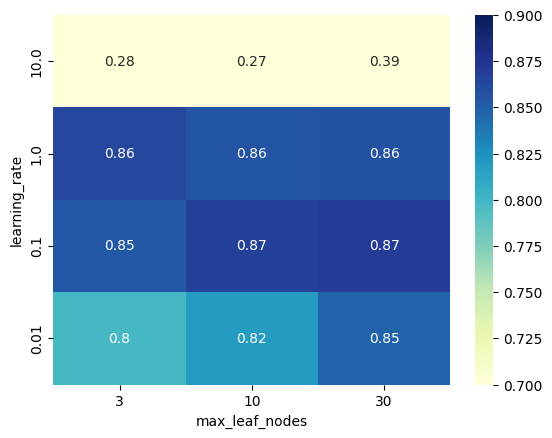

In [26]:
import seaborn as sns

ax = sns.heatmap(
    pivoted_cv_results, annot=True, cmap="YlGnBu", vmin=0.7, vmax=0.9
)
ax.invert_yaxis()

# Hyperparameter tuning by randomized search

Grid-search approach has limitations. It does not scale well when the number of parameters to tune increases. Also, the grid imposes a regularity during the search which might miss better parameter values between two consecutive values on the grid.

In [27]:
from scipy.stats import loguniform


class loguniform_int:
    """Integer valued version of the log-uniform distribution"""

    def __init__(self, a, b):
        self._distribution = loguniform(a, b)

    def rvs(self, *args, **kwargs):
        """Random variable sample"""
        return self._distribution.rvs(*args, **kwargs).astype(int)

In [29]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    "classifier__l2_regularization": loguniform(1e-6, 1e3),
    "classifier__learning_rate": loguniform(0.001, 10),
    "classifier__max_leaf_nodes": loguniform_int(2, 256),
    "classifier__min_samples_leaf": loguniform_int(1, 100),
    "classifier__max_bins": loguniform_int(2, 255),
}


model_random_search = RandomizedSearchCV(
    model,
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    verbose=1,
)


model_random_search.fit(train_feat , train_target)


accuracy = model_random_search.score(test_feat, test_target)

print(f"The test accuracy score of the best model is {accuracy:.2f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The test accuracy score of the best model is 0.87


# Evaluation of Hyperparameter Tuning



In [32]:
cv_results = pd.DataFrame(model_grid_search.cv_results_)
cv_results[
    [
        "param_classifier__learning_rate",
        "param_classifier__max_leaf_nodes",
        "mean_test_score",
        "std_test_score",
        "rank_test_score",
    ]
]

,param_classifier__learning_rate,param_classifier__max_leaf_nodes,mean_test_score,std_test_score,rank_test_score
0,0.01,3,0.797763,0.000517,9
1,0.01,10,0.818391,0.001080,8
2,0.01,30,0.847260,0.001020,7
3,0.1,3,0.853275,0.000797,6
4,0.1,10,0.866941,0.002281,2
5,0.1,30,0.869859,0.001769,1
6,1,3,0.863921,0.000022,3
7,1,10,0.855732,0.001872,5
8,1,30,0.856883,0.002205,4
9,10,3,0.282343,0.003232,11


>One important caveat here concerns the evaluation of the generalization performance. Indeed, the mean and standard deviation of the scores computed by the cross-validation in the grid-search are potentially not good estimates of the generalization performance we would obtain by refitting a model with the best combination of hyper-parameter values on the full dataset. Note that scikit-learn automatically performs this refit by default when calling model_grid_search.fit. This refitted model is trained with more data than the different models trained internally during the cross-validation of the grid-search.

> We therefore used knowledge from the full dataset to both decide our model’s hyper-parameters and to train the refitted model.

> Because of the above, one must keep an external, held-out test set for the final evaluation of the refitted model. We highlight here the process using a single train-test split.

In [34]:
# Best approach
cv_results = cross_validate(
                    model_grid_search, features_df, target, cv=5,
                    n_jobs=2, return_estimator=True
                           )

cv_results = pd.DataFrame(cv_results)
cv_test_scores = cv_results["test_score"]
print(
    "Generalization score with hyperparameters tuning:\n"
    f"{cv_test_scores.mean():.3f} ± {cv_test_scores.std():.3f}"
)

Generalization score with hyperparameters tuning:
0.874 ± 0.003


In addition, passing the parameter `return_estimator=True`, we can check the
value of the best hyperparameters obtained for each fold of the outer
cross-validation.

In [35]:
for cv_fold, estimator_in_fold in enumerate(cv_results["estimator"]):
    print(
        f"Best hyperparameters for fold #{cv_fold + 1}:\n"
        f"{estimator_in_fold.best_params_}"
    )

Best hyperparameters for fold #1:
{'classifier__learning_rate': 0.1, 'classifier__max_leaf_nodes': 30}
Best hyperparameters for fold #2:
{'classifier__learning_rate': 0.1, 'classifier__max_leaf_nodes': 30}
Best hyperparameters for fold #3:
{'classifier__learning_rate': 0.1, 'classifier__max_leaf_nodes': 30}
Best hyperparameters for fold #4:
{'classifier__learning_rate': 0.1, 'classifier__max_leaf_nodes': 30}
Best hyperparameters for fold #5:
{'classifier__learning_rate': 0.1, 'classifier__max_leaf_nodes': 30}


# Exercise

In [36]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

data, target = fetch_california_housing(return_X_y=True, as_frame=True)
target *= 100  # rescale the target in k$

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42
)

In this exercise, we progressively define the regression pipeline and
later tune its hyperparameters.

Start by defining a pipeline that:
* uses a `StandardScaler` to normalize the numerical data;
* uses a `sklearn.neighbors.KNeighborsRegressor` as a predictive model.

In [39]:
from sklearn.neighbors import KNeighborsRegressor as KNR

num_preprocessor = StandardScaler()

preprocessor = ColumnTransformer(
    [
        (
            'num_preprocessor',
            num_preprocessor,
            data.columns
        )
    ],
    remainder='passthrough'
)


model = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("regressor", KNR()),
    ]
                )

# Building the predictive model
cv_results = cross_validate(model, data, target, cv=5)
cv_test_scores = cv_results["test_score"]
print(
    "Generalization score without hyperparameters tuning:\n"
    f"{cv_test_scores.mean():.3f} ± {cv_test_scores.std():.3f}"
)

Generalization score without hyperparameters tuning:
0.521 ± 0.044


In [43]:
import numpy as np

# Creating the Param Distribution for the Random Search
param_distributions = {
                         'regressor__n_neighbors': np.logspace(0, 3, num=10).astype(np.int32),
                         'preprocessor__num_preprocessor__with_mean': (True, False),
                         'preprocessor__num_preprocessor__with_std': (True, False)
                      }


# Updating the model
model_random_search = RandomizedSearchCV(
    model,
    param_distributions=param_distributions,
    n_iter=20,
    cv=5,
    verbose=1,
)

# Best approach
cv_results = cross_validate(
                    model_random_search, data, target, cv=5,
                    n_jobs=2, return_estimator=True
                           )

cv_results = pd.DataFrame(cv_results)
cv_test_scores = cv_results["test_score"]
print(
    "Generalization score with hyperparameters tuning:\n"
    f"{cv_test_scores.mean():.3f} ± {cv_test_scores.std():.3f}"
)

Generalization score with hyperparameters tuning:
0.550 ± 0.040


In [46]:
for cv_fold, estimator_in_fold in enumerate(cv_results["estimator"]):
    print(
        f"Best hyperparameters for fold #{cv_fold + 1}:\n"
        f"{estimator_in_fold.best_params_}"
    )

Best hyperparameters for fold #1:
{'regressor__n_neighbors': 21, 'preprocessor__num_preprocessor__with_std': True, 'preprocessor__num_preprocessor__with_mean': True}
Best hyperparameters for fold #2:
{'regressor__n_neighbors': 21, 'preprocessor__num_preprocessor__with_std': True, 'preprocessor__num_preprocessor__with_mean': False}
Best hyperparameters for fold #3:
{'regressor__n_neighbors': 46, 'preprocessor__num_preprocessor__with_std': True, 'preprocessor__num_preprocessor__with_mean': False}
Best hyperparameters for fold #4:
{'regressor__n_neighbors': 21, 'preprocessor__num_preprocessor__with_std': True, 'preprocessor__num_preprocessor__with_mean': False}
Best hyperparameters for fold #5:
{'regressor__n_neighbors': 10, 'preprocessor__num_preprocessor__with_std': True, 'preprocessor__num_preprocessor__with_mean': False}


# Final Project - Penguins 

In [1]:
import pandas as pd
import numpy as np


df_url = "https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/penguins.csv"

penguins_df = pd.read_csv(df_url)


columns = ["Body Mass (g)", "Flipper Length (mm)", "Culmen Length (mm)"]

target_name = "Species" 


# Remove records with missing values for the columns of interest
penguins_no_na_df = penguins_df[columns + [target_name]].dropna()


penguins_no_na_df.head()

,Body Mass (g),Flipper Length (mm),Culmen Length (mm),Species
0,3750.0,181.0,39.1,Adelie Penguin (Pygoscelis adeliae)
1,3800.0,186.0,39.5,Adelie Penguin (Pygoscelis adeliae)
2,3250.0,195.0,40.3,Adelie Penguin (Pygoscelis adeliae)
4,3450.0,193.0,36.7,Adelie Penguin (Pygoscelis adeliae)
5,3650.0,190.0,39.3,Adelie Penguin (Pygoscelis adeliae)


In [2]:
(
    penguins_no_na_df
    # Value Counts
    [target_name].value_counts()

)

Species
Adelie Penguin (Pygoscelis adeliae)          151
Gentoo penguin (Pygoscelis papua)            123
Chinstrap penguin (Pygoscelis antarctica)     68
Name: count, dtype: int64

In [3]:
penguins_no_na_df.describe()

,Body Mass (g),Flipper Length (mm),Culmen Length (mm)
count,342.000000,342.000000,342.000000
mean,4201.754386,200.915205,43.921930
std,801.954536,14.061714,5.459584
min,2700.000000,172.000000,32.100000
25%,3550.000000,190.000000,39.225000
50%,4050.000000,197.000000,44.450000
75%,4750.000000,213.000000,48.500000
max,6300.000000,231.000000,59.600000


In [4]:
# Creating a Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate

features = penguins_no_na_df[columns]
target = penguins_no_na_df[target_name]


model = Pipeline(
            steps = [
                        ("preprocessor", StandardScaler()),
                        ("classifier", KNeighborsClassifier(n_neighbors=5))
                    ]
                )

cv_results = cross_validate(model, features, target, cv = 10, scoring="balanced_accuracy")


cv_results = pd.DataFrame(cv_results)
cv_test_scores = cv_results["test_score"]
print(
    "CV test score\n"
    f"{cv_test_scores.mean():.3f} ± {cv_test_scores.std():.3f}"
)

CV test score
0.952 ± 0.042


In [14]:
# Testing different hyperparameters

model.get_params()

{'memory': None,
 'steps': [('preprocessor', StandardScaler()),
  ('classifier', KNeighborsClassifier(n_neighbors=51))],
 'verbose': False,
 'preprocessor': StandardScaler(),
 'classifier': KNeighborsClassifier(n_neighbors=51),
 'preprocessor__copy': True,
 'preprocessor__with_mean': True,
 'preprocessor__with_std': True,
 'classifier__algorithm': 'auto',
 'classifier__leaf_size': 30,
 'classifier__metric': 'minkowski',
 'classifier__metric_params': None,
 'classifier__n_jobs': None,
 'classifier__n_neighbors': 51,
 'classifier__p': 2,
 'classifier__weights': 'uniform'}

In [15]:
cv_results = pd.DataFrame(cv_results)

cv_results


,fit_time,score_time,test_score
0,0.007873,0.004361,1.000000
1,0.002465,0.003499,1.000000
2,0.004122,0.006279,1.000000
3,0.005940,0.005974,0.918803
4,0.007627,0.004668,0.882540
5,0.004511,0.003091,0.952381
6,0.004536,0.002910,0.977778
7,0.004682,0.004016,0.930159
8,0.003287,0.002576,0.907937
9,0.006058,0.003997,0.952381


In [18]:
# Classifier n_neighbors
classifier__n_neighbors = 51

model.set_params(classifier__n_neighbors=classifier__n_neighbors)


cv_results_2 = cross_validate(model, features, target, cv = 10, scoring="balanced_accuracy")


cv_results_2 = pd.DataFrame(cv_results_2)

cv_results_2 

,fit_time,score_time,test_score
0,0.005309,0.006124,0.952381
1,0.006641,0.006335,0.977778
2,0.005010,0.005941,1.000000
3,0.003395,0.006703,0.863248
4,0.004045,0.006901,0.882540
5,0.004433,0.005000,0.952381
6,0.006281,0.004441,0.955556
7,0.004847,0.005005,0.952381
8,0.004499,0.005593,0.930159
9,0.004765,0.005004,0.952381


In [20]:
cv_results['test_score_n51'] = cv_results_2['test_score']

In [21]:
# Classifier n_neighbors
classifier__n_neighbors = 101

model.set_params(classifier__n_neighbors=classifier__n_neighbors)


cv_results_3 = cross_validate(model, features, target, cv = 10, scoring="balanced_accuracy")


cv_results_2 = pd.DataFrame(cv_results_3)

cv_results['test_score_n101'] = cv_results_3['test_score'] 

In [22]:
model = Pipeline(
            steps = [
                        # ("preprocessor", StandardScaler()),
                        ("classifier", KNeighborsClassifier(n_neighbors=5))
                    ]
                )

cv_results_4 = cross_validate(model, features, target, cv = 10, scoring="balanced_accuracy")


cv_results_4 = pd.DataFrame(cv_results_4)

cv_results['test_score_no_std'] = cv_results_4['test_score'] 

In [28]:
(cv_results['test_score'] > cv_results['test_score_no_std']).sum()

10

In [34]:
model.get_params()

{'memory': None,
 'steps': [('preprocessor',), ('classifier', KNeighborsClassifier())],
 'verbose': False}

In [68]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV

model = Pipeline(
            steps = [
                        ("preprocessor", None),
                        ("classifier", KNeighborsClassifier())
                    ]
                )


# Working with different pre-processors
all_preprocessors = [
    None,
    StandardScaler(),
    MinMaxScaler(),
    QuantileTransformer(n_quantiles=100),
    PowerTransformer(method="box-cox"),
]


classifier__n_neighbors = [5, 51, 101]

param_values = {
                    "preprocessor": all_preprocessors,
                    "classifier__n_neighbors": classifier__n_neighbors
}



grid_search_cv = GridSearchCV(model, 
                              param_grid=param_values
                              )

cv_results = cross_validate(grid_search_cv,features, target, cv = 10, 
                            scoring="balanced_accuracy",
                            return_estimator=True
                           )

In [71]:
for cv_fold, estimator_in_fold in enumerate(cv_results["estimator"]):
    print(
        f"Best hyperparameters for fold #{cv_fold + 1}:\n"
        f"{estimator_in_fold.best_params_}\n"
        f"With test score {cv_results['test_score'][cv_fold]:.3f}\n"
    )

Best hyperparameters for fold #1:
{'classifier__n_neighbors': 5, 'preprocessor': QuantileTransformer(n_quantiles=100)}
With test score 0.952

Best hyperparameters for fold #2:
{'classifier__n_neighbors': 5, 'preprocessor': QuantileTransformer(n_quantiles=100)}
With test score 0.927

Best hyperparameters for fold #3:
{'classifier__n_neighbors': 5, 'preprocessor': StandardScaler()}
With test score 1.000

Best hyperparameters for fold #4:
{'classifier__n_neighbors': 5, 'preprocessor': MinMaxScaler()}
With test score 0.944

Best hyperparameters for fold #5:
{'classifier__n_neighbors': 5, 'preprocessor': StandardScaler()}
With test score 0.883

Best hyperparameters for fold #6:
{'classifier__n_neighbors': 5, 'preprocessor': QuantileTransformer(n_quantiles=100)}
With test score 1.000

Best hyperparameters for fold #7:
{'classifier__n_neighbors': 5, 'preprocessor': QuantileTransformer(n_quantiles=100)}
With test score 0.978

Best hyperparameters for fold #8:
{'classifier__n_neighbors': 5, 'pr

In [73]:
cv_results_df = pd.DataFrame(cv_results)


cv_results_df["test_score"].mean()

0.9474358974358974